# Inspect the Data
The dataset is retrieved from Kaggle, for more details [click here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [239]:
import pandas as pd
import numpy as np

In [240]:
RAND_STATE_VALUE = 0
TRAIN_PATH = "datasets/train.csv"
TEST_PATH = "datasets/test.csv"
DATA_DESCRIPTION_PATH = "datasets/data_description.txt"

## Data Description

In [241]:
with open(DATA_DESCRIPTION_PATH, "r") as f:
    data_description = f.read()

In [242]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [243]:
from typing import Tuple

def check_null(df: pd.DataFrame) -> Tuple[pd.DataFrame, list]:
    null_cols = df.columns[df.isnull().any()].to_list()
    null_df = pd.DataFrame(df.isnull().sum(), columns = ["null_count"])
    null_df["null_percentage"] = null_df["null_count"] / len(df)
    return null_df, null_cols

In [244]:
df_train = pd.read_csv(TRAIN_PATH)
df_train = df_train.drop("Id", axis = 1)  

In [245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [246]:
null_df, null_cols = check_null(df_train)

In [247]:
null_df.loc[null_cols].sort_values(by = "null_percentage", ascending = False)

,null_count,null_percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [248]:
df_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
881,50,RL,44.0,13758,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,187500
1195,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
437,45,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,119000
394,50,RL,60.0,10134,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109000
1333,50,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,125500


# EDA and Visualization

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style = "darkgrid")

In [250]:
df_num = df_train.select_dtypes(include = ["int64", "float64"])
df_num.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
166,20,NaN,10708,5,5,1955,1993,0.0,379,768,...,476,0,0,0,142,0,0,11,2009,190000
193,160,24.0,2522,7,5,2004,2004,50.0,0,0,...,0,40,0,0,0,0,0,5,2006,130000
1150,20,57.0,8280,6,5,1950,1950,0.0,0,0,...,0,0,214,0,0,0,0,11,2007,124000
1368,120,NaN,4435,6,5,2003,2004,170.0,685,0,...,140,0,0,0,0,0,0,6,2009,144000
1381,20,NaN,12925,6,7,1970,1970,0.0,865,0,...,0,42,0,0,0,0,0,5,2008,237500


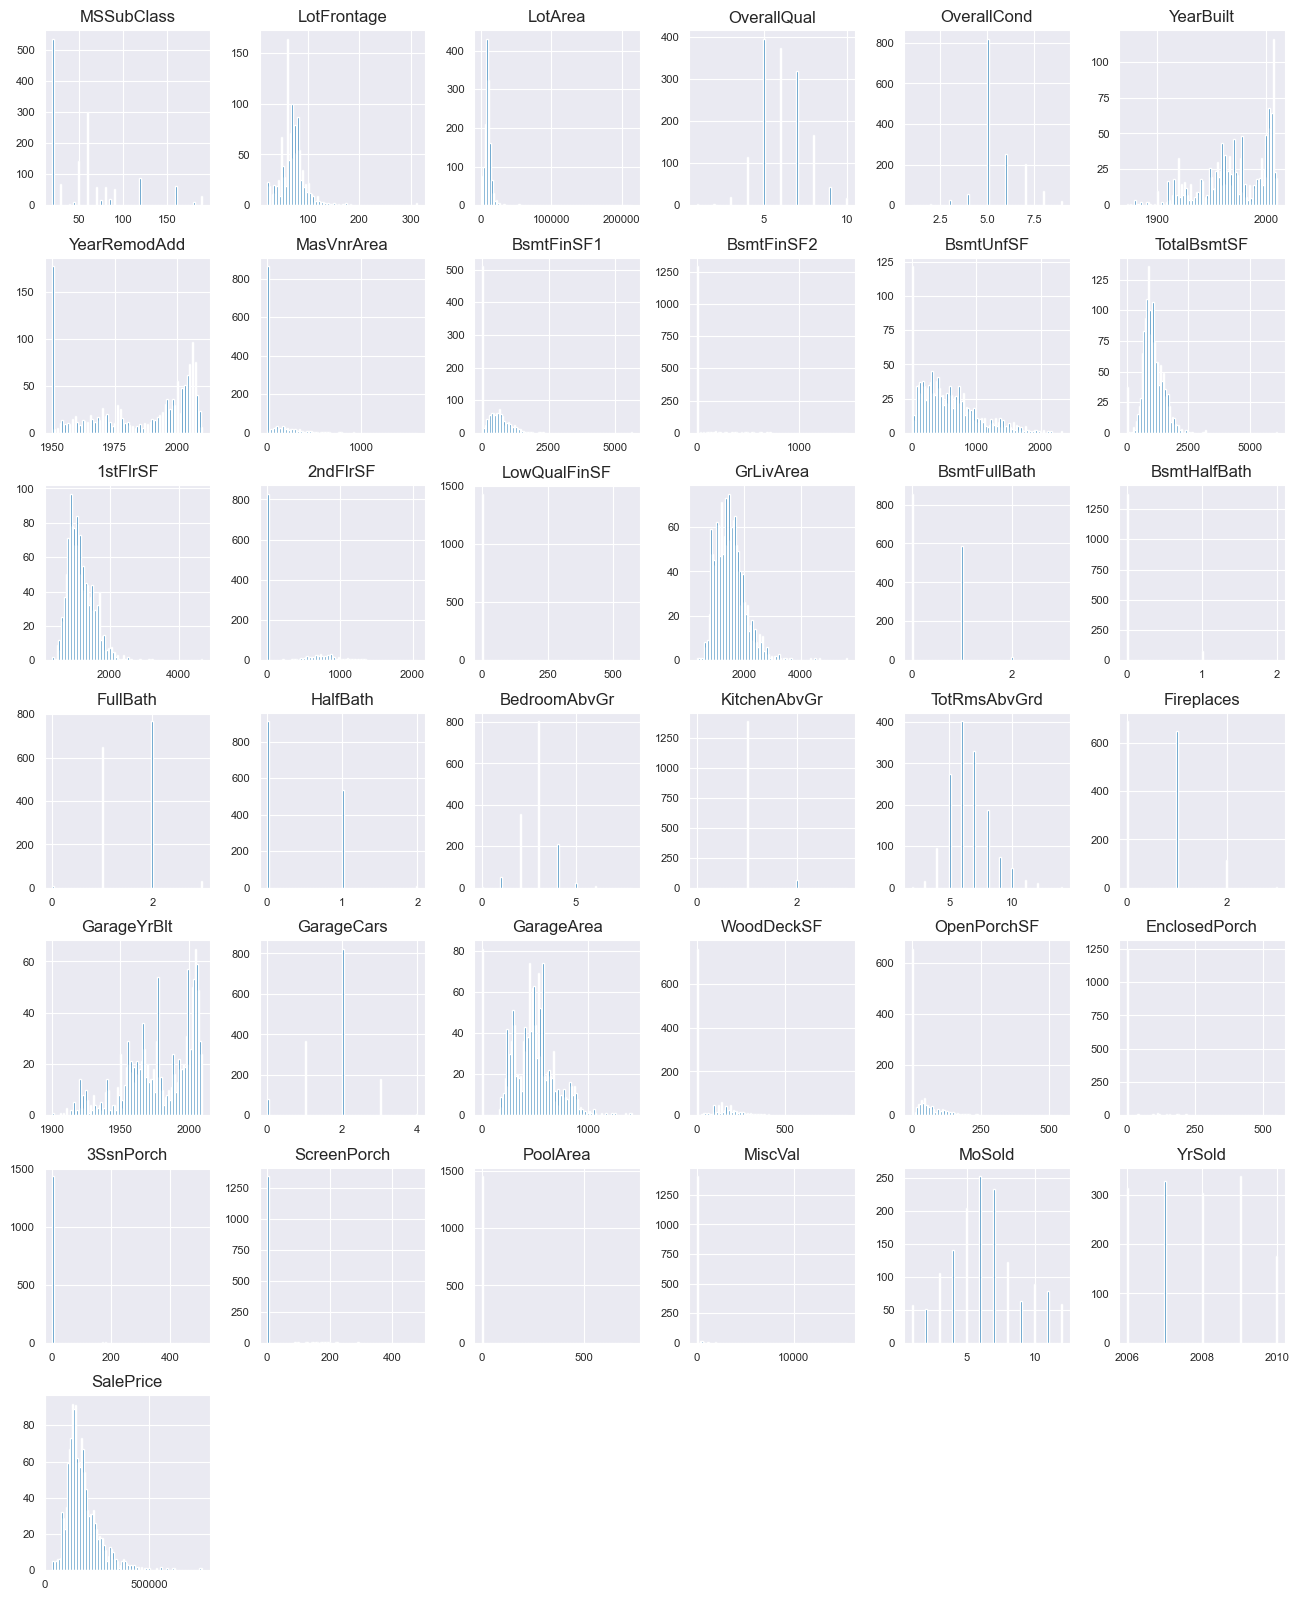

In [251]:
df_num.hist(figsize = (16, 20), bins = 100, xlabelsize = 8, ylabelsize = 8)
plt.show()

In [252]:
df_num["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness:  1.88


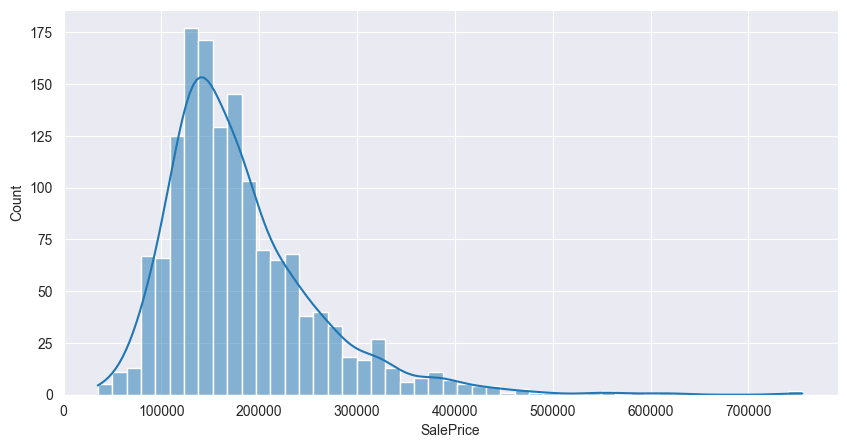

In [253]:
plt.figure(figsize = (10, 5))
sns.histplot(df_num["SalePrice"], kde = True)
print(f"Skewness: {df_num['SalePrice'].skew(): .2f}")
plt.show()

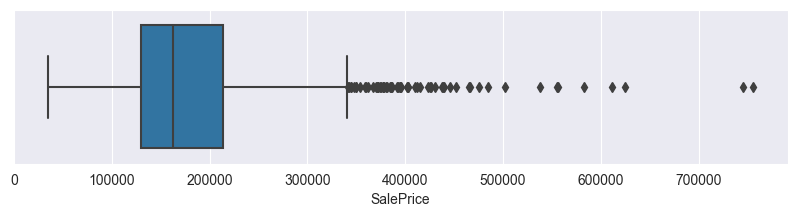

In [254]:
plt.figure(figsize = (10, 2))
sns.boxplot(x = df_num["SalePrice"])
plt.show()

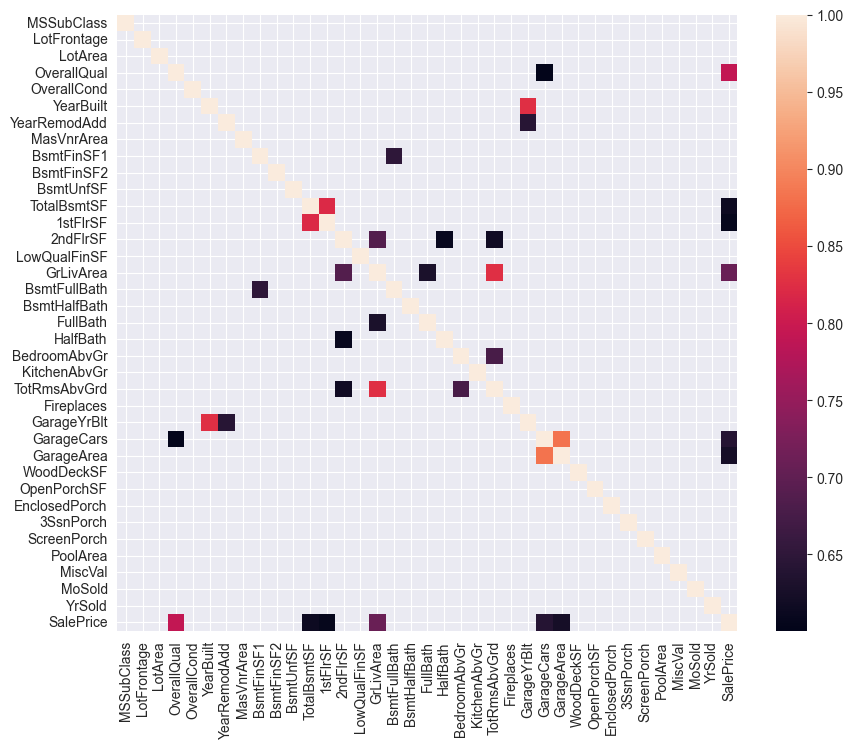

In [255]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_num.corr(), mask = df_num.corr() < 0.6)
plt.show()

In [256]:
correlation = df_num.corrwith(df_num["SalePrice"]).sort_values(ascending = False)

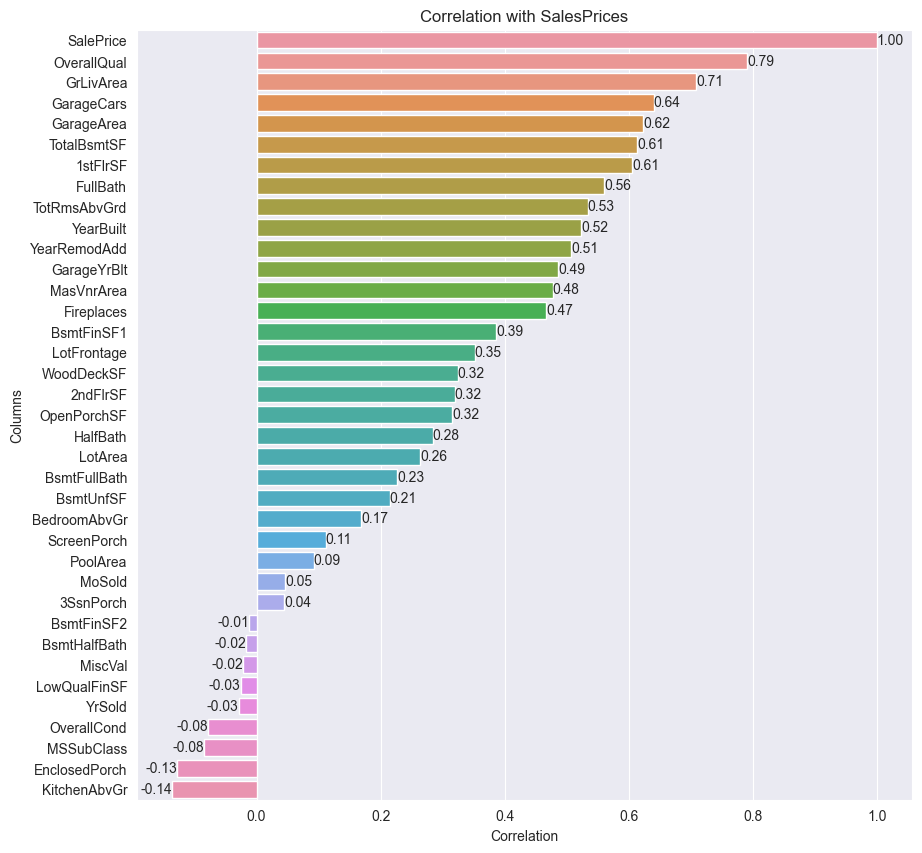

In [257]:
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = correlation.values, y = correlation.index)
ax.set(ylabel = "Columns", xlabel = "Correlation", title = "Correlation with SalesPrices")
ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%0.2f")
ax.tick_params(axis = "y", labelsize = 10)
plt.show()

In [258]:
top_corrs = correlation.head(16).index.to_list()
top_corrs.remove("SalePrice")

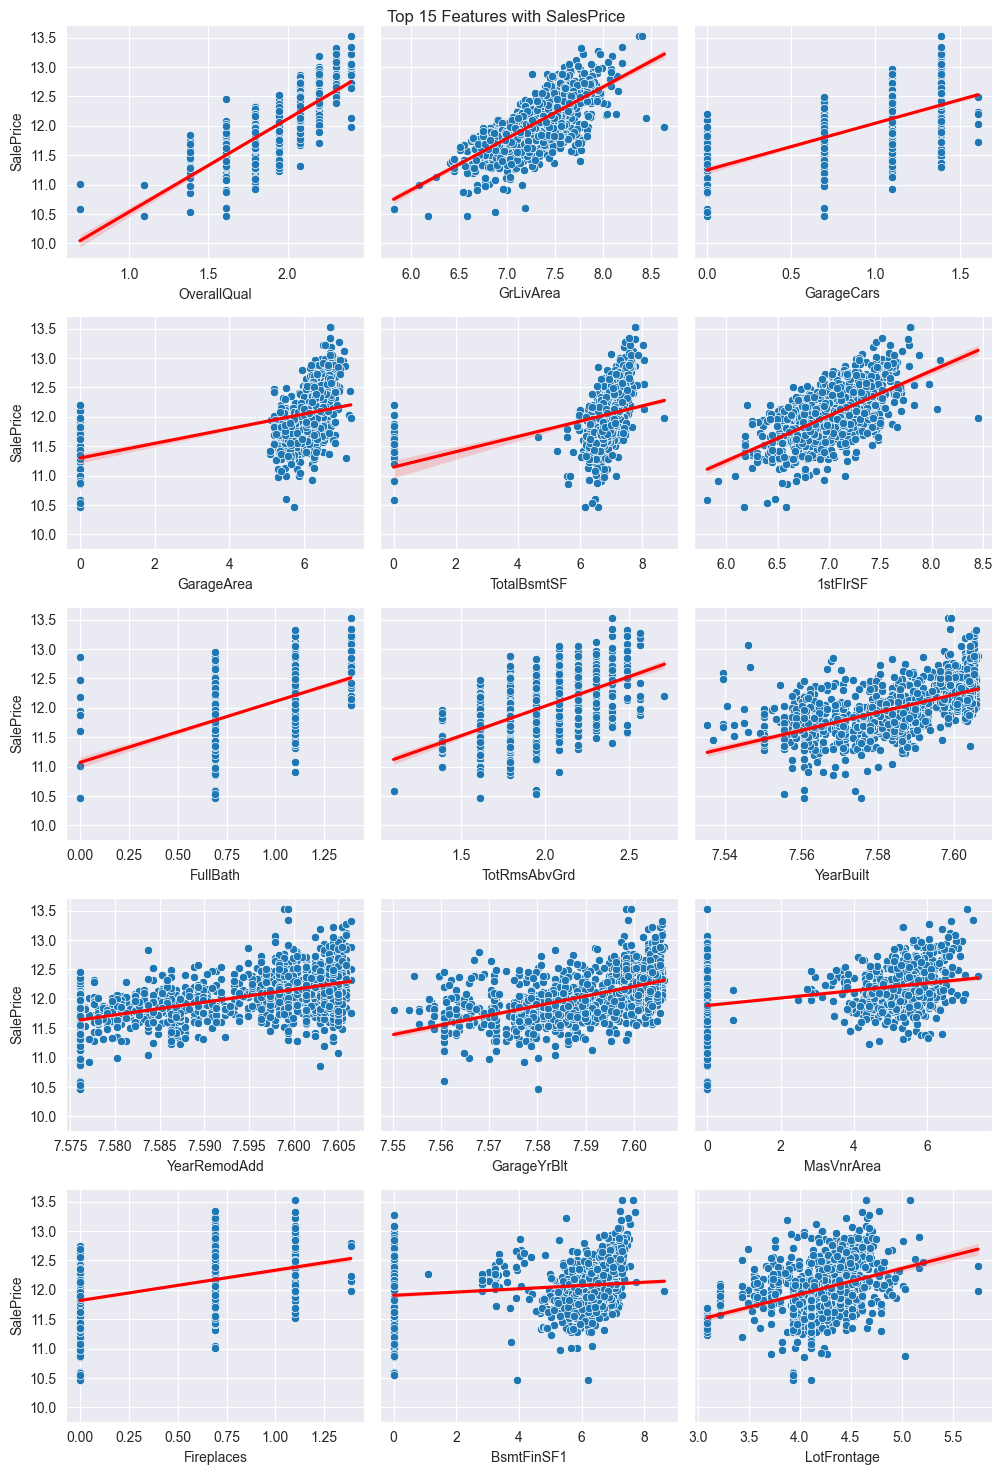

In [259]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10, 15), sharey = True)
sale_price_log = np.log1p(df_num["SalePrice"])

for i, top_corr in enumerate(top_corrs):
    row = i // 3
    col = i % 3
    top_corr_log = np.log1p(df_num[top_corr])
    sns.scatterplot(ax = axes[row][col], x = top_corr_log, y = sale_price_log)
    sns.regplot(ax = axes[row][col], x = top_corr_log, y = sale_price_log, scatter = False, color = "red")

plt.suptitle(f"Top {len(top_corrs)} Features with SalesPrice")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [290]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [291]:
def convert_dtype(df: pd.DataFrame, cols: list, dtype: str) -> pd.DataFrame:
    df[cols] = df[cols].astype(dtype)
    return df

In [292]:
def fill_na(df: pd.DataFrame, num_features: list, cat_features: list) -> pd.DataFrame:
    _, cat_null_cols = check_null(df[cat_features])
    _, num_null_cols = check_null(df[num_features])
    
    df[cat_null_cols] = df[cat_null_cols].fillna("None")
    
    for col in num_null_cols:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
    
    return df

In [293]:
def preprocess(df: pd.DataFrame) -> np.ndarray:
    num_features = df.select_dtypes(include = ["int64", "float64"]).columns.to_list()
    cat_features = df.select_dtypes(include = ["object"]).columns.to_list()
    
    numerical_pipe = Pipeline(
        steps = [
            ("log_transform", FunctionTransformer(np.log1p)),
            ("scaler", StandardScaler())
        ]
    )
    
    categorical_pipe = Pipeline(
        steps = [
            ("label_encode", OneHotEncoder(handle_unknown = "ignore"))
        ]
    )
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("num", numerical_pipe, num_features),
            ("cat", categorical_pipe, cat_features)
        ]
    )
    preprocessed_data = preprocessor.fit_transform(df)
    return preprocessed_data 

In [294]:
to_str_cols = ["OverallQual", "OverallCond", "MSSubClass"]
df_train = convert_dtype(df_train, to_str_cols, "str")

In [295]:
numerical_features = df_train.select_dtypes(include = ["int64", "float64"]).columns.to_list()
categorical_features = df_train.select_dtypes(include = ["object"]).columns.to_list()

In [296]:
df_train = fill_na(df_train, numerical_features, categorical_features)

In [297]:
selected_features = ["OverallCond", "OverallQual", "GrLivArea", "MSSubClass"]
X = df_train[selected_features]
y = df_train["SalePrice"]
X = preprocess(X)
X.shape

(1460, 35)

# Model Training

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RAND_STATE_VALUE)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R^2 score: {model.score(X_test, y_test): .4f}")

R^2 score:  0.7411


## Model Evaluation

In [279]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [305]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [307]:
linear_metric = pd.DataFrame({
    "metric": ["MAE", "MSE", "RMSE", "R^2"],
    "value": [mae, mse, rmse, r2]
})
linear_metric

,metric,value
0,MAE,2.510684e+04
1,MSE,1.787832e+09
2,RMSE,4.228276e+04
3,R^2,7.411134e-01
